In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import patches


# 手动设置字体路径
font_path = None

# Windows 系统中常见的中文字体路径
windows_fonts = ["C:/Windows/Fonts/simhei.ttf", "C:/Windows/Fonts/msyh.ttc"]

# macOS 系统中常见的中文字体路径
mac_fonts = ["/System/Library/Fonts/STHeiti Medium.ttc", "/System/Library/Fonts/PingFang.ttc"]

# Linux 系统可能有的中文字体
linux_fonts = ["/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc"]

# 检查字体路径是否存在
for path in windows_fonts + mac_fonts + linux_fonts:
    if font_manager.Path(path).exists():
        font_path = path
        break

if font_path is None:
    raise FileNotFoundError("找不到系统中可用的中文字体，请手动指定字体路径。")

# 使用找到的字体设置字体属性
from matplotlib import rcParams
rcParams['font.sans-serif'] = [font_manager.FontProperties(fname=font_path).get_name()]
rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题


In [19]:

import pandas as pd
import re
from io import StringIO

def convert_to_graph_data(input_data):
    # Determine the type of input and read data accordingly
    if isinstance(input_data, str):
        if input_data.endswith('.xlsx'):
            df = pd.read_excel(input_data)
        elif input_data.endswith('.csv'):
            df = pd.read_csv(input_data)
        elif input_data.endswith('.txt'):
            df = pd.read_csv(input_data, sep='|', engine='python', skipinitialspace=True, skiprows=2)
            df = df.dropna(axis=1, how='all')
        else:  # Assume it's a markdown format string
            input_data = input_data.strip()  # Remove leading/trailing newlines
            df = pd.read_csv(StringIO(input_data), sep='|', engine='python', skipinitialspace=True, skiprows=1)
            df = df.dropna(axis=1, how='all')
    else:
        raise ValueError("Input must be a file path or a markdown string.")

    # Preprocess dataframe to remove leading/trailing whitespaces
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # Create list for graph data
    graph_data = []

    # Iterate over dataframe rows to construct the dependency list, ignoring headers
    prev_row = [None, None, None]
    for _, row in df.iterrows():
        row_data = [
            row[0] if pd.notna(row[0]) else prev_row[0],
            row[1] if pd.notna(row[1]) else prev_row[1],
            row[2] if pd.notna(row[2]) else prev_row[2]
        ]
        graph_data.append(row_data)
        prev_row = row_data

    # Replace None with the corresponding element from the previous row
    for i in range(1, len(graph_data)):
        for j in range(len(graph_data[i])):
            if graph_data[i][j] is None:
                graph_data[i][j] = graph_data[i-1][j]

    # Return graph data list
    return graph_data

# Example usage
if __name__ == "__main__":
    input_markdown = """
| 一级指标         | 二级性能指标            | 三级性能指标                |
| ---------------- | ----------------------- | --------------------------- |
| 最小线宽分辨     | 光学系统分辨率          | 反射镜面型误差（nm RMS）   |
|                 |                          | 透镜焦距偏差（%）           |
|                 | 数值孔径（NA）          | 数值孔径公差                |
| CD测量可重复性   | 系统稳定性              | 光源亮度稳定性（%）         |
|                 |                          | 波前控制稳定性（波长 RMS） |
| 缺陷定位精度     | 探测与定位精度          | 探测器分辨率（μm）         |
|                 |                          | 运动系统重复定位精度（μm） |
| 波长范围         | 光源谱特性              | 光源频谱宽度（nm）         |
|                 | 色散控制                | 色散补偿精度（%）           |
| 照明光线主入射角 | 光束控制                | 入射角偏差（°）            |
|                 |                          | 照明均匀性（%）             |
| 系统洁净度       | 真空环境控制            | 真空系统粒子浓度（颗/m³）  |
| 测试效率         | 曝光时间控制            | 光源亮度控制（%）           |
| 最小线宽分辨     | 系统稳定性              | 光源亮度稳定性（%）         |
| 波长范围         | 光束控制                | 照明均匀性（%）             |

    """
    graph_data = convert_to_graph_data(input_markdown)
    print(graph_data)


[['最小线宽分辨', '光学系统分辨率', '反射镜面型误差（nm RMS）'], ['最小线宽分辨', '光学系统分辨率', '透镜焦距偏差（%）'], ['最小线宽分辨', '数值孔径（NA）', '数值孔径公差'], ['CD测量可重复性', '系统稳定性', '光源亮度稳定性（%）'], ['CD测量可重复性', '系统稳定性', '波前控制稳定性（波长 RMS）'], ['缺陷定位精度', '探测与定位精度', '探测器分辨率（μm）'], ['缺陷定位精度', '探测与定位精度', '运动系统重复定位精度（μm）'], ['波长范围', '光源谱特性', '光源频谱宽度（nm）'], ['波长范围', '色散控制', '色散补偿精度（%）'], ['照明光线主入射角', '光束控制', '入射角偏差（°）'], ['照明光线主入射角', '光束控制', '照明均匀性（%）'], ['系统洁净度', '真空环境控制', '真空系统粒子浓度（颗/m³）'], ['测试效率', '曝光时间控制', '光源亮度控制（%）'], ['最小线宽分辨', '系统稳定性', '光源亮度稳定性（%）'], ['波长范围', '光束控制', '照明均匀性（%）']]


/var/folders/d3/y48825nd7552km6p3p0wvt000000gn/T/ipykernel_3282/54681973.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[0] if pd.notna(row[0]) else prev_row[0],
/var/folders/d3/y48825nd7552km6p3p0wvt000000gn/T/ipykernel_3282/54681973.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[1] if pd.notna(row[1]) else prev_row[1],
/var/folders/d3/y48825nd7552km6p3p0wvt000000gn/T/ipykernel_3282/54681973.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 

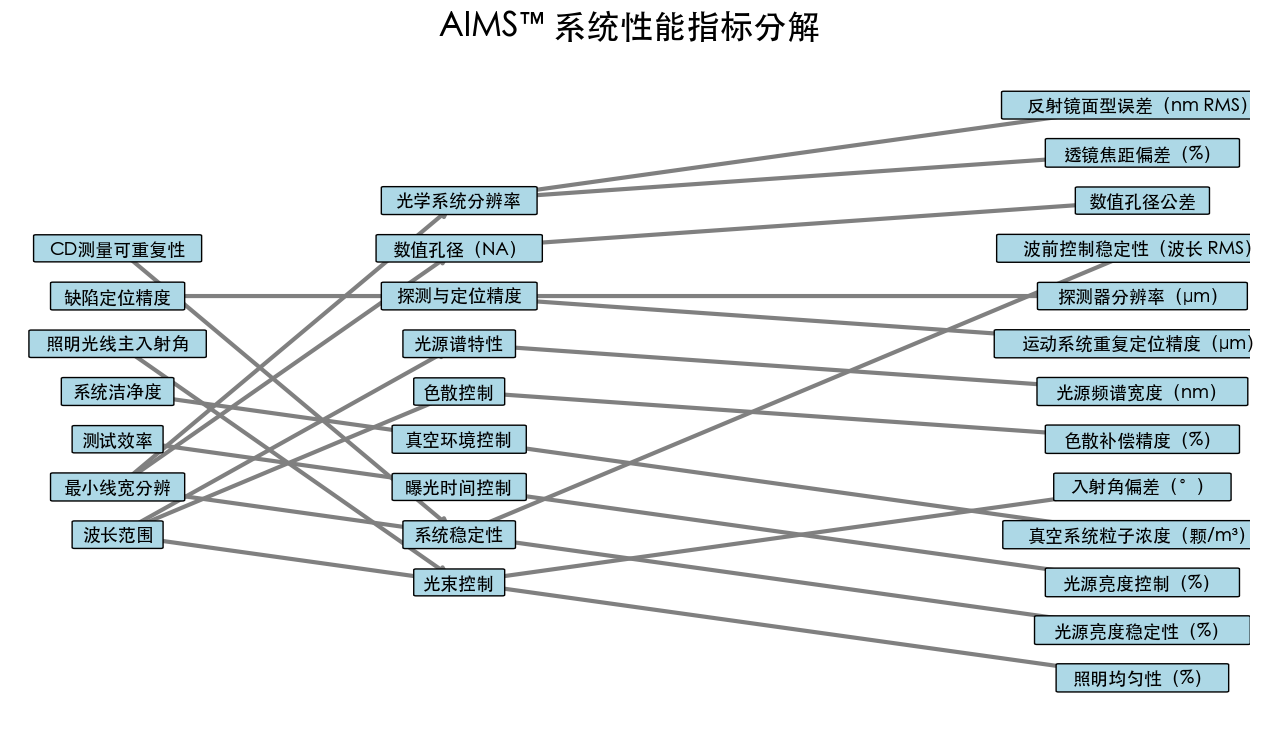

In [20]:

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import patches

class HierarchicalGraph:
    def __init__(self, data=None, title="AIMS™ 系统性能指标分解"):
        self.data = data  # List of lists, each list is a dependency chain
        self.title = title
        self.G = nx.DiGraph()

    def preprocess_data(self):
        # Build nodes and edges based on the input data
        for chain in self.data:
            for i in range(len(chain) - 1):
                self.G.add_node(chain[i])
                self.G.add_node(chain[i + 1])
                self.G.add_edge(chain[i], chain[i + 1])

    def create_graph(self):
        # Preprocess data to create nodes and edges
        self.preprocess_data()

    def find_levels(self):
        # Assign levels to nodes based on their distance from a root node
        node_levels = {}
        for node in nx.topological_sort(self.G):
            predecessors = list(self.G.predecessors(node))
            if not predecessors:
                node_levels[node] = 0  # Root level
            else:
                node_levels[node] = max(node_levels[pred] for pred in predecessors) + 1

        # Adjust levels for leaf nodes to ensure they are at the last level
        max_level = max(node_levels.values())
        for node in self.G.nodes:
            if self.G.out_degree(node) == 0:  # Leaf node
                node_levels[node] = max_level + 1

        return node_levels

    def draw_graph(self):
        node_levels = self.find_levels()
        # Split nodes into levels for positioning
        layers = {}
        for node, level in node_levels.items():
            if level not in layers:
                layers[level] = []
            layers[level].append(node)

        # Sort nodes within each level based on their appearance order in the input data
        node_order = {node: idx for idx, chain in enumerate(self.data) for node in chain}
        for level in layers:
            layers[level].sort(key=lambda x: node_order.get(x, float('inf')))

        pos = {}
        # Set positions for nodes based on their level
        x_spacing = 3
        y_spacing = 1
        max_width_per_level = {level: 0 for level in layers}

        # Calculate the maximum width for each level
        plt.figure(figsize=(16, 9))
        renderer = plt.gcf().canvas.get_renderer()
        for level, nodes in layers.items():
            for node in nodes:
                text = plt.text(0, 0, node, fontsize=13, alpha=0)
                bbox = text.get_window_extent(renderer=renderer).transformed(plt.gca().transData.inverted())
                max_width_per_level[level] = max(max_width_per_level[level], bbox.width * 1.2)
                text.remove()

        for level, nodes in layers.items():
            x = level * x_spacing
            y_start = y_spacing * len(nodes) / 2
            for i, node in enumerate(nodes):
                pos[node] = (x, y_start - i * y_spacing)

        # Draw graph
        nx.draw_networkx_edges(self.G, pos, edgelist=self.G.edges(), arrowstyle='-|>', arrowsize=10, edge_color='gray', width=3)

        ax = plt.gca()
        for node, (x, y) in pos.items():
            text = ax.text(x, y, node, fontsize=13, ha='center', va='center', zorder=2, alpha=0)
            renderer = plt.gcf().canvas.get_renderer()
            bbox = text.get_window_extent(renderer=renderer).transformed(ax.transData.inverted())
            width = max(max_width_per_level[node_levels[node]], bbox.width * 1.2)
            height = bbox.height * 1.5
            # Transparent box
            rect = patches.FancyBboxPatch(
                (x - width / 2, y - height / 2), width, height,
                boxstyle="round,pad=0.02",
                linewidth=1,
                facecolor='lightblue',
                zorder=1,
            )
            ax.add_patch(rect)
            text.set_alpha(1)

        plt.title(self.title, size=24)
        plt.axis('off')
        plt.show()

    def draw_from_data(self, data=None):
        if data:
            self.data = data
        self.create_graph()
        self.draw_graph()

# Example usage
if __name__ == "__main__":
    data = [
        ["CD测量可重复性", "光源稳定性", "亮度稳定性"],
        ["波长范围", "光源波长", "EUV 波长稳定性"],
        ["最小线宽分辨", "最小分辨率能力", "光学元件品质"],
        ["系统洁净度", "真空洁净度"],
        ["最小分辨率能力", "真空洁净度"]
    ]

    graph = HierarchicalGraph(graph_data)
    graph.draw_from_data()


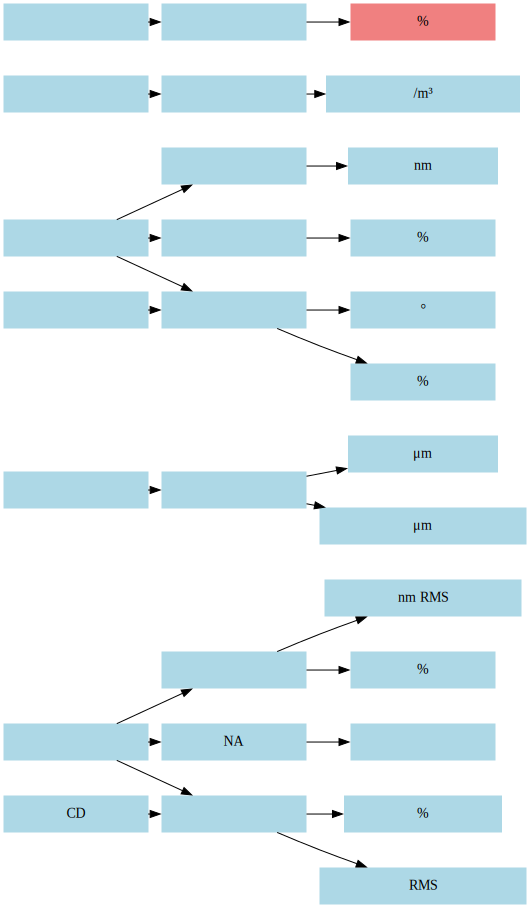

In [40]:
import graphviz

class HierarchicalGraph:
    def __init__(self, data=None, title="AIMS™ 系统性能指标分解", rankdir='LR', node_shape='box', node_style='filled', arrow_size=1.0, node_width=2.0, layer_spacing=1.5, node_spacing=1.0):
        self.data = data  # List of lists, each list is a dependency chain
        self.title = title
        self.rankdir = rankdir  # Graph direction: 'LR' (left-to-right) or 'TB' (top-to-bottom)
        self.node_shape = node_shape  # Node shape: 'box', 'ellipse', etc.
        self.node_style = node_style  # Node style: 'filled', etc.
        self.arrow_size = arrow_size  # Arrow size for edges
        self.node_width = node_width  # Node width used uniformly for each layer
        self.layer_spacing = layer_spacing  # Spacing between layers
        self.node_spacing = node_spacing  # Spacing between nodes within the same layer
        self.G = {}
        self.edges = set()

        # Define subsystem colors for the last level nodes
        self.subsystem_colors = {
            "光源亮度控制（%）": "lightcoral",
            "亮度稳定性": "lightgreen",
            "EUV 波长稳定性": "lightskyblue",
            "真空洁净度": "gold",
        }

    def preprocess_data(self):
        # Build nodes and edges based on the input data
        for chain in self.data:
            for i in range(len(chain) - 1):
                # Add nodes to the graph
                if chain[i] not in self.G:
                    self.G[chain[i]] = []
                if chain[i + 1] not in self.G:
                    self.G[chain[i + 1]] = []

                # Add edge to the graph if not already present
                edge = (chain[i], chain[i + 1])
                if edge not in self.edges:
                    self.G[chain[i]].append(chain[i + 1])
                    self.edges.add(edge)

    def create_graph(self):
        # Preprocess data to create nodes and edges
        self.preprocess_data()

    def draw_graph(self):
        # Create a graphviz Digraph object
        dot = graphviz.Digraph(comment=self.title, format='png')
        dot.attr(rankdir=self.rankdir, ranksep=str(self.layer_spacing), nodesep=str(self.node_spacing))  # Set direction and spacing

        # Add nodes with specific shapes, sizes, and styles to the graph
        for node in self.G:
            color = self.subsystem_colors.get(node, "lightblue")  # Use specific color if node is a subsystem, else default
            dot.node(node, shape=self.node_shape, style=self.node_style, color=color, width=str(self.node_width))

        # Add edges with specific arrow size
        for node, successors in self.G.items():
            for successor in successors:
                dot.edge(node, successor, arrowsize=str(self.arrow_size))

        # Display graph in Jupyter Notebook
        return graphviz.Source(dot.source)

    def draw_from_data(self, data=None):
        if data:
            self.data = data
        self.create_graph()
        return self.draw_graph()

# Example usage
if __name__ == "__main__":
    data = [
        ["最小线宽分辨", "最小分辨率能力", "光学元件品质"],
        ["CD测量可重复性", "光源稳定性", "亮度稳定性"],
        ["波长范围", "光源波长", "EUV 波长稳定性"],
        ["系统洁净度", "真空洁净度"],
        ["最小分辨率能力", "真空洁净度"]
    ]

    graph = HierarchicalGraph(
        graph_data,
        title="AIMS™ 系统性能指标分解",
        rankdir='LR',  # Direction: 'LR' for left to right, 'TB' for top to bottom
        node_shape='box',  # Node shape: 'box', 'ellipse', 'circle', etc.
        node_style='filled',  # Node style: 'filled', etc.
        arrow_size=1.0,  # Arrow size for edges
        node_width=2.0,  # Uniform node width
        layer_spacing=.2,  # Spacing between layers
        node_spacing=.5  # Spacing between nodes within the same layer
    )
    

    display(graph.draw_from_data())  # In Jupyter, this will display the graph